# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import db_connect
engine = db_connect()

In [2]:

# Me traigo los datos de la url proporcionada y los guardo localmente en mi proyecto
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Obtener las dimensiones
df.shape

(48895, 16)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Existen un total de 48895 filas (en este caso, habitaciones o propiedades) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, `price`.

- Las variables `last_review` y `reviews_per_month` cuentan con valores nulos, pero siguen teniendo una cantidad de datos considerable como para tenerse en cuenta

- El resto de variables cuentan casi siempre todos los valores.

- Los datos cuentan con 10 características numéricas y 6 características categóricas si nos vamos estrictamente al tipo de dato que aparece en el dataset. A pesar de esto, consideraré como categóricas también las características `id` y `host_id`, debido a que no constituyen datos con relación matemática alguna, y sí presentan características de indicadores o etiquetas. Por tanto mi dataset quedaría con:<br>**8 características numéricas y 8 categóricas**

In [5]:
duplicados = df.duplicated(subset=['id'])
num_duplicados = duplicados.sum()
num_duplicados

np.int64(0)

In [6]:
# Seleccion de atributos relevantes
df_imp = df.drop(["id", "name", "host_id", "host_name", "latitude", "longitude", "last_review"], axis = 1)
df_imp

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


En mi selección de atributos relevantes decido excluir de mi dataset las columnas que representan información que no aportará a mi modelo predictivo:  
`id`  
`name`  
`host_id`  
`host_name`  
`latitude`  
`longitude`  
`last_review`  
Toda esta información tiene carácter descriptivo en mis datos pero no obedece ningún patrón ni puedo tratarla para tomar alguna decisión. Consideré eliminar latitud y longitud porque me aporta más valor el nombre del barrio en que están ubicadas las casas a la hora de agrupar los datos, mientras que las coordenadas serían útiles más bien para hacer una representación en un mapa de los inmuebles.

In [7]:
# Variables categoricas ["neighbourhood_group", "neighbourhood", "room_type"]
print(df_imp["neighbourhood_group"].value_counts(), "\n")
print(df_imp["neighbourhood"].value_counts().sort_values(ascending=False), "\n")
print(df_imp["room_type"].value_counts(), "\n")

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64 

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64 

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64 



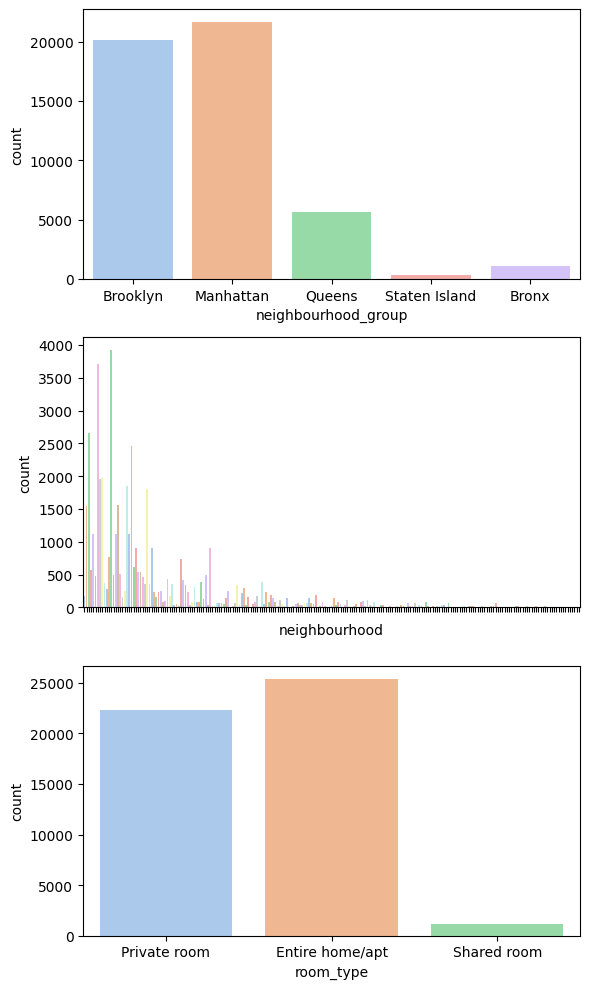

In [8]:
fig, axis = plt.subplots(3, 1, figsize = (6, 10))

sns.countplot(ax = axis[0], data = df_imp, x = "neighbourhood_group", palette='pastel', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[1], data = df_imp, x = "neighbourhood", palette='pastel', hue= "neighbourhood", legend=False)
axis[1].set_xticklabels([])
sns.countplot(ax = axis[2], data = df_imp, x = "room_type", palette='pastel', hue= "room_type", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

• De mis datos en `neighbourhood_group` puedo decir que más de un 80 % de los inmuebles están localizados o en Brooklyn o en Manhattan, siendo Staten Island y el Bronx los menos habituales  
• `neighbourhood` está distribuida en 221 valores, lo cual no me da gran información visual, pero si se identifican Williamsburg y Bedford-Stuyvesant como los más habituales  
• En cuanto al tipo de habitación, `room_type` se distribuye en más de un 95 % entre Habitaciones Privadas o Pisos, siendo lo menos común las Habitaciones Compartidas

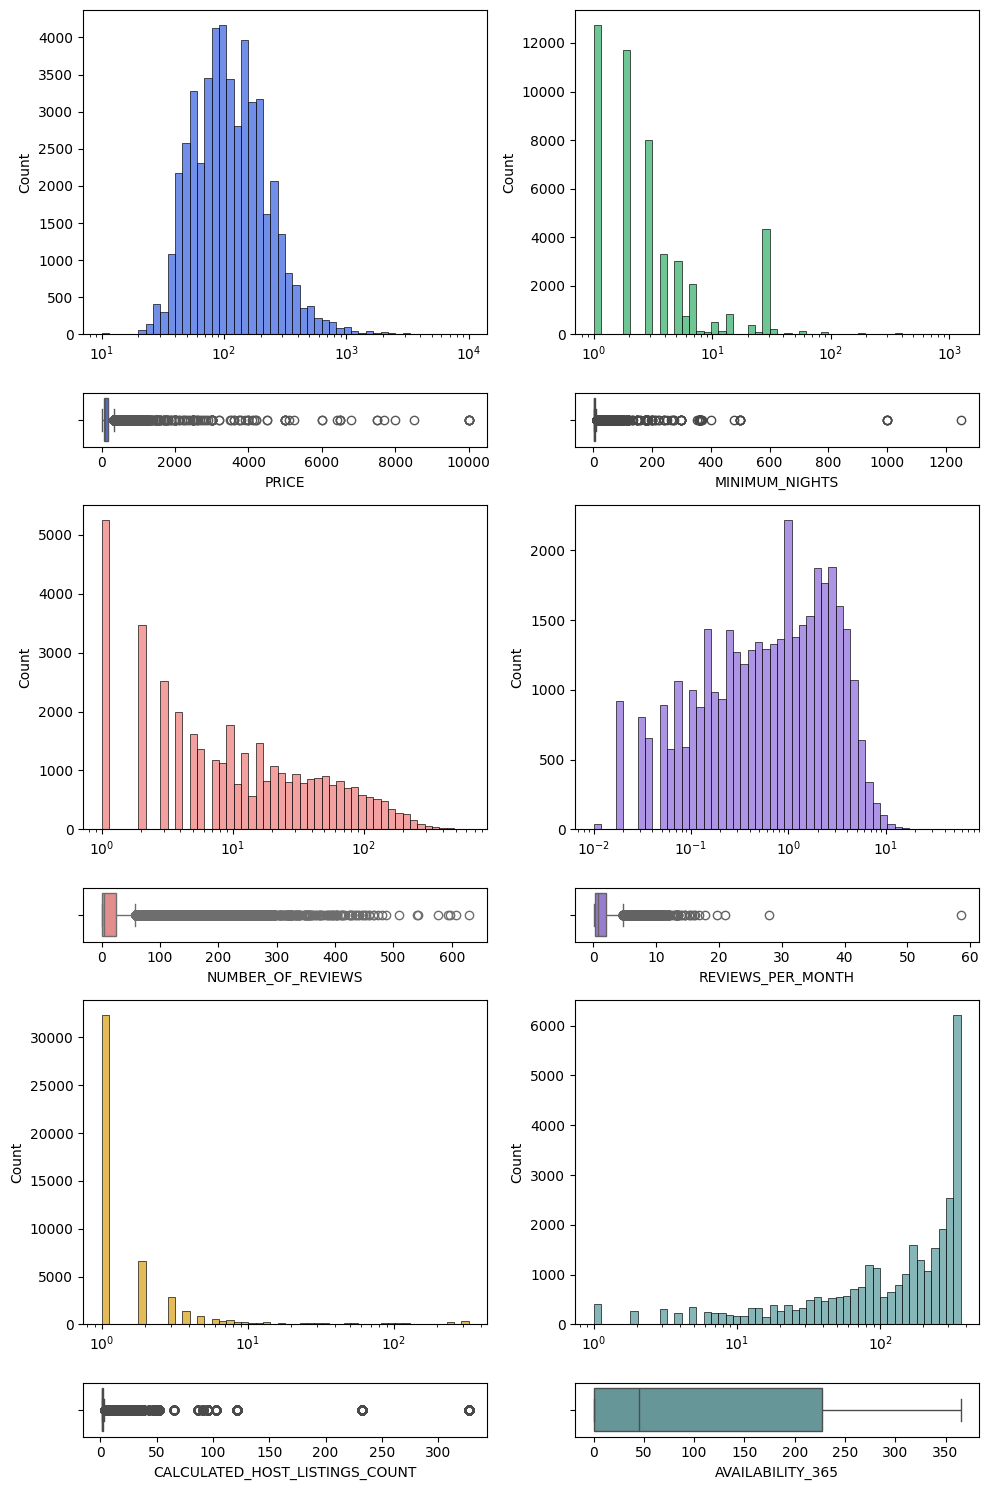

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [80]:
# ANALISIS SOBRE VARIABLES NUMERICAS
# Mis varibles numéricas a considerar serían:
# "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count" y "availability_365"

fig, axis = plt.subplots(6, 2, figsize = (10, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# price
sns.histplot(ax = axis[0, 0], data = df_imp, x = "price", bins=50, log_scale=True, color="royalblue").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_imp, x = "price", color="royalblue").set(xlabel = "PRICE")

# minimum_nights
sns.histplot(ax = axis[0, 1], data = df_imp, x = "minimum_nights", bins=50, log_scale=True, color="mediumseagreen").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df_imp, x = "minimum_nights", color="mediumseagreen").set(xlabel = "MINIMUM_NIGHTS")

# number_of_reviews
sns.histplot(ax = axis[2, 0], data = df_imp, x = "number_of_reviews", log_scale=True, bins=50, color="lightcoral").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df_imp, x = "number_of_reviews", color="lightcoral").set(xlabel = "NUMBER_OF_REVIEWS")

# reviews_per_month
sns.histplot(ax = axis[2, 1], data = df_imp, x = "reviews_per_month", log_scale=True, bins=50, color="mediumpurple").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df_imp, x = "reviews_per_month", color="mediumpurple").set(xlabel = "REVIEWS_PER_MONTH")

# calculated_host_listings_count
sns.histplot(ax = axis[4, 0], data = df_imp, x = "calculated_host_listings_count", log_scale=True, bins=50, color="goldenrod").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df_imp, x = "calculated_host_listings_count", color="goldenrod").set(xlabel = "CALCULATED_HOST_LISTINGS_COUNT")

# availability_365
sns.histplot(ax = axis[4, 1], data = df_imp, x = "availability_365", log_scale=True, bins=50, color="cadetblue").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = df_imp, x = "availability_365", color="cadetblue").set(xlabel = "AVAILABILITY_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

df_imp.describe()

**CONCLUSIONES DE ANÁLISIS DE VARIABLES NUMÉRICAS**  
* `price` : Muchos precios extremos por alojamientos caros que distorsionan la media, la mayor cantidad de datos se concentra entre precios de 50 a 180 pero hay valores que llegan hasta los 10000, lo cual pudiera representar propiedades de lujo.  
* `minumum_nights` : La mayoría exige un mínimo de entre 1 y 10 noches, habiendo un pico en 30 lo cual indicaría que un mes es un valor frecuente también, lo cual son datos razonables. Hay presencia de muchos outliers, incluso que llegan hasta mas de 1000 noches, lo cual puede deberse a errores en los datos o alguna estrategia particular del anfitrión.  
* `number_of_reviews` : La mayoría tiene pocas reseñas, aunque hay presencia de muchos outliers también y algunas propiedades que llegan a tener mas de 600 reviews, lo cual pudiera indicar mucha popularidad de estas.  
* `reviews_per_month` : La mayoría de los datos representan unas reseñas mensuales de las propiedades que oscilan entre menos de 1 a 5 mensuales, aunque hay presencia de valores extremos de hasta más de 50.  
* `calculated_host_listings_count` : La mayoría de los propietarios tienen un solo alojamiento, pero hay presencia de algunos que poseen más de 100, pudiera deberse a grandes actores comerciales o empresas con cientos de propiedades.  
* `availability_365` : En cuanto a la disponibilidad anual muchos alojamientos están disponibles los 365 días del año y otros muchos apenas menos de 50 días, hay mucha menor cantidad de outliers que en los anteriores. Hay dos perfiles claros, anfitriones que alquilan a tiempo completo y otros que lo hacen de forma puntual.  

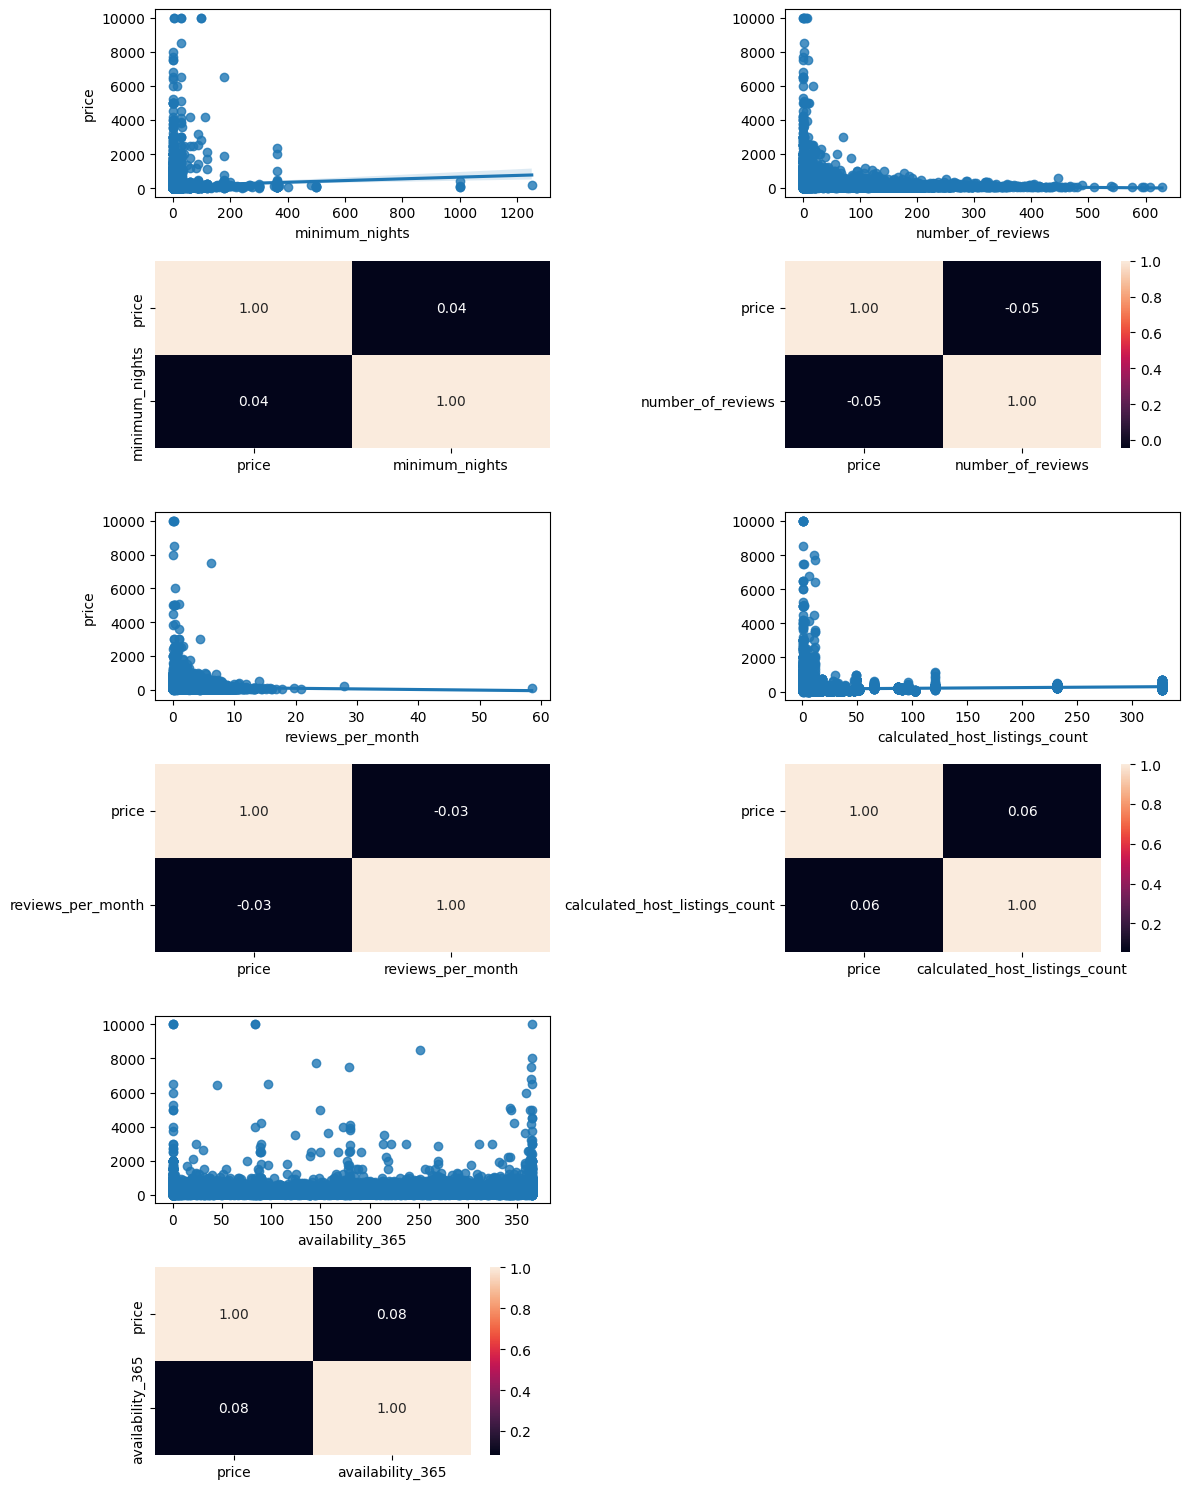

In [96]:
# ANÁLISIS NUMÉRICO - NUMÉRICO BUSCANDO CORRELACIONES ENTRE VARIABLES BUSCANDO RELACIÓN CON MI VARIABLE OBJETIVO "price"
fig, axis = plt.subplots(6, 2, figsize = (12, 15))
# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "reviews_per_month", y = "price")
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = df, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0])

axis[4, 1].axis("off")
axis[5, 1].axis("off")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No existe una correlación entre prácticamente ninguna variable numérica por sí sola con la variable a predecir `price`.

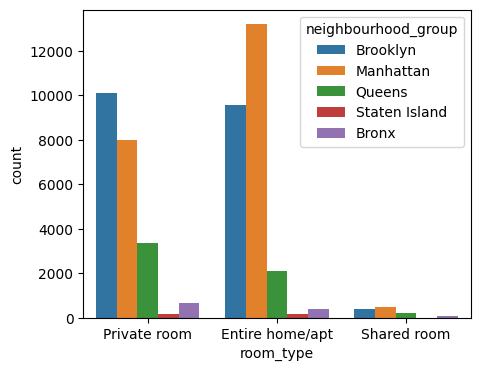

In [98]:
# ANÁLISIS CATEGÓRICO - CATEGÓRICO
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df_imp, x = "room_type", hue = "neighbourhood_group")

plt.show()

ppppp